In [34]:
!pip install pvlib

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pytz import timezone

#import pvlib
from pvlib import clearsky, atmosphere
from pvlib.location import Location

## Define the current location and time zone

In [36]:
name = 'Phoenix'
latitude = 33.4484 
longitude = -112.0740
altitude = 331 # (meters)
time_zone = 'US/Arizona'
phx = Location(latitude, longitude, time_zone, altitude, name)
print(phx)

Location: 
  name: Phoenix
  latitude: 33.4484
  longitude: -112.074
  altitude: 331
  tz: US/Arizona


## List the insolation for 10 minutes

In [39]:
dt = '2020-04-20 13:14:00'
#uncomment the following line to get the next 10 minutes
#dt = datetime.datetime.now(tz=timezone('US/Arizona'))
times = pd.date_range(start=dt, periods=10, freq='1min', tz=phx.tz)
cs = phx.get_clearsky(times)  # ineichen with climatology table by default
print('global horizontal (W/m2)')
print(cs['ghi'])

global horizontal (W/m2)
2020-04-20 13:14:00-07:00    947.947653
2020-04-20 13:15:00-07:00    947.081845
2020-04-20 13:16:00-07:00    946.198035
2020-04-20 13:17:00-07:00    945.296238
2020-04-20 13:18:00-07:00    944.376475
2020-04-20 13:19:00-07:00    943.438764
2020-04-20 13:20:00-07:00    942.483123
2020-04-20 13:21:00-07:00    941.509570
2020-04-20 13:22:00-07:00    940.518128
2020-04-20 13:23:00-07:00    939.508814
Freq: T, Name: ghi, dtype: float64


## Plot the insolation for one day

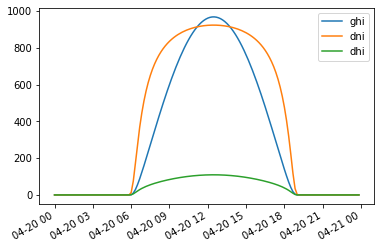

In [38]:
times = pd.date_range(start='2020-04-20', periods=24*6, freq='10min', tz=phx.tz)
cs = phx.get_clearsky(times)  # ineichen with climatology table by default
cs.plot()